<a href="https://colab.research.google.com/github/lukas-plojhar/Rhomberg-v2/blob/main/Rhomberg_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download dataset


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

!unzip '/content/drive/MyDrive/vogis_8000samples.zip' -d '/content/vogis_8000samples'
!mv '/vogis_8000samples' '/vogis'

# Dataframe

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import json
import os
import statistics as st
sns.color_palette()

# Loading annotations from file
df = None
annotations = None
annotation_filepath = '/content/dataset/annotations.json'

with open(annotation_filepath, 'r') as f:
  annotations = json.load(f)

df = pd.DataFrame(annotations['annotations']).drop(['id', 'iscrowd', 'category_id'], axis=1)
df_img = pd.DataFrame(annotations['images']).drop(['width', 'height'], axis=1)
df = df.merge(df_img, left_on='image_id', right_on='id').drop(['id'], axis=1)

In [ ]:
# Area STD
df['area_std'] = df['area'] / st.stdev(df['area'])

# Bounding box aspect ratio and STD
df['aspect_ratio'] = df['bbox'].apply(lambda x: max(x[2], x[3]) / min(x[2], x[3]))
df['aspect_ratio_std'] = df['aspect_ratio'] / st.stdev(df['aspect_ratio'])

# Overview

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms.functional as F
from torchvision.utils import make_grid, draw_bounding_boxes
from torchvision.io import read_image
from pylab import rcParams
rcParams['figure.figsize'] = 20, 400

IMAGES = '/content/dataset/images'

In [ ]:
def show_images(images):
  images = [read_image(os.path.join(IMAGES, image)) for image in images]

  for image in images:
    boxes = df[df['file_name']==image]['bbox'].tolist()
    boxes = torch.tensor(boxes, dtype=torch.float)
    image = draw_bounding_boxes(image, boxes=boxes)


  grid = make_grid(images)
  return show(grid)

def show(imgs, boxes=False):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

def get_boxes(image_name):
  boxes = df[df['file_name'] == image_name]['bbox'].tolist()
  boxes = [torch.tensor(box, dtype=torch.float) for box in boxes]
  print(boxes)

In [ ]:
def show_images(images):
  images = [read_image(os.path.join(IMAGES, image)) for image in images]

  for image in images:
    boxes = df[df['file_name']==image]['bbox'].tolist()
    boxes = torch.tensor(boxes, dtype=torch.float)
    image = draw_bounding_boxes(image, boxes=boxes)


  grid = make_grid(images)
  return show(grid)


# ====================================
def show(imgs: list):
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

def get_boxes(image_name):
  boxes = df[df['file_name'] == image_name]['bbox'].tolist()
  boxes = [torch.tensor(box, dtype=torch.float) for box in boxes]
  print(boxes)

In [ ]:
df.groupby('image_id').size().sort_values(ascending=False).head(3)

image_id
6987    67
2597    60
12      57
dtype: int64

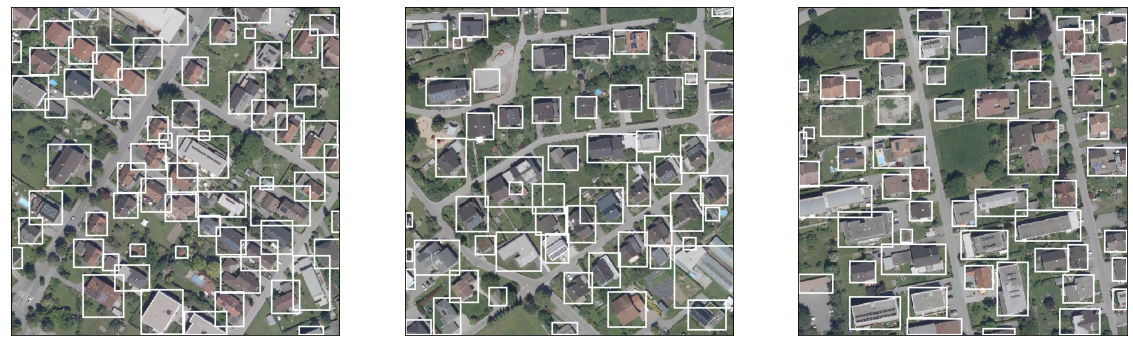

In [ ]:
from PIL import ImageDraw, Image
# Areas with std above 10
# image_filenames = df[df['area']>1000]['file_name'].sample(3).tolist()
image_filenames = ['1150.jpg', '7320.jpg', '1245.jpg']
images = []

for img in image_filenames:
  path = os.path.join(IMAGES, img) 
  image = Image.open(path)
  boxes = df[df['file_name'] == img]['bbox'].tolist()
  draw = ImageDraw.Draw(image)
  [draw.rectangle([(box[0], box[1]), (box[0]+box[2], box[1]+box[3])], width=3) for box in boxes]
  images.append(image)

fix, axs = plt.subplots(ncols=len(images), squeeze=False)
for i, image in enumerate(images):
    axs[0, i].imshow(np.asarray(image))
    axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

# Plotting

Text(0.5, 1.0, 'Distribution of area sizes')

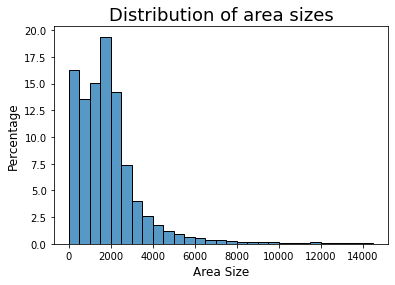

In [ ]:
# Distribution of area sizes
ch = sns.histplot(df['area'], stat='percent', kde=False, bins=np.arange(0, 15000, 500))
ch.set_xlabel("Area Size", fontsize = 12)
ch.set_ylabel("Percentage", fontsize = 12)
ch.set_title("Distribution of area sizes", fontsize = 18)

Text(0.5, 1.0, 'Distribution of aspect ratios')

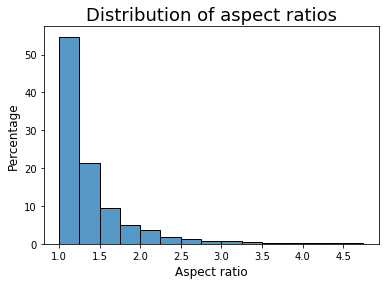

In [ ]:
# Distribution of aspect ratios
ch = sns.histplot(df['aspect_ratio'], stat='percent', kde=False, bins=np.arange(1, 5, 0.25))
ch.set_xlabel("Aspect ratio", fontsize = 12)
ch.set_ylabel("Percentage", fontsize = 12)
ch.set_title("Distribution of aspect ratios", fontsize = 18)

Text(0.5, 1.0, 'Distribution of number of labels in one sample ')

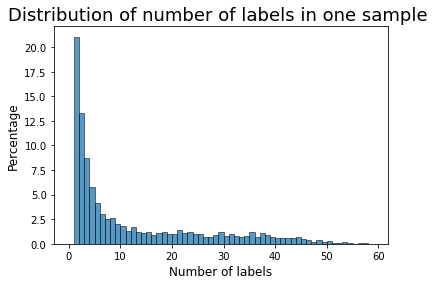

In [ ]:
ch = sns.histplot(df.groupby('image_id').size(), stat='percent', kde=False, bins=np.arange(0, 60, 1))
ch.set_xlabel("Number of labels", fontsize = 12)
ch.set_ylabel("Percentage", fontsize = 12)
ch.set_title("Distribution of number of labels in one sample ", fontsize = 18)

# Plotting

In [ ]:
# sns.distplot(aspect_ratios, bins=100, kde=False)
pd.DataFrame(annotations['annotations'])

,id,image_id,category_id,iscrowd,area,bbox,segmentation
0,1,5,1,0,715.0,"[419.0, 573.0, 55.0, 27.0]","[[441.0, 573.0, 419.0, 599.0, 473.0, 599.0, 44..."
1,2,5,1,0,6741.5,"[168.0, 409.0, 118.0, 116.0]","[[230.0, 409.0, 168.0, 467.0, 221.0, 524.0, 28..."
2,3,5,1,0,6540.5,"[0.0, 403.0, 93.0, 124.0]","[[34.0, 403.0, 0.0, 441.0, 0.0, 502.0, 27.0, 5..."
3,4,5,1,0,530.5,"[576.0, 357.0, 24.0, 42.0]","[[593.0, 357.0, 576.0, 380.0, 599.0, 398.0, 59..."
4,5,5,1,0,6603.5,"[252.0, 323.0, 116.0, 116.0]","[[310.0, 323.0, 252.0, 382.0, 306.0, 438.0, 36..."
...,...,...,...,...,...,...,...
36324,36325,8090,1,0,939.5,"[576.0, 32.0, 24.0, 49.0]","[[580.0, 32.0, 576.0, 78.0, 599.0, 80.0, 599.0..."
36325,36326,8090,1,0,2124.5,"[129.0, 30.0, 57.0, 46.0]","[[139.0, 30.0, 139.0, 39.0, 132.0, 38.0, 129.0..."
36326,36327,8090,1,0,2053.5,"[329.0, 0.0, 68.0, 36.0]","[[331.0, 0.0, 329.0, 24.0, 341.0, 25.0, 345.0,..."
36327,36328,8090,1,0,2078.5,"[202.0, 0.0, 52.0, 58.0]","[[218.0, 0.0, 219.0, 11.0, 202.0, 19.0, 212.0,..."
